In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

In [31]:
df = pd.read_csv('Space_Corrected.csv')

In [32]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [33]:
df.shape

(4324, 9)

In [34]:
df.isnull().sum()

Unnamed: 0           0
Unnamed: 0.1         0
Company Name         0
Location             0
Datum                0
Detail               0
Status Rocket        0
 Rocket           3360
Status Mission       0
dtype: int64

In [35]:
(df[' Rocket'].isnull().sum() / len(df)) * 100

77.70582793709528

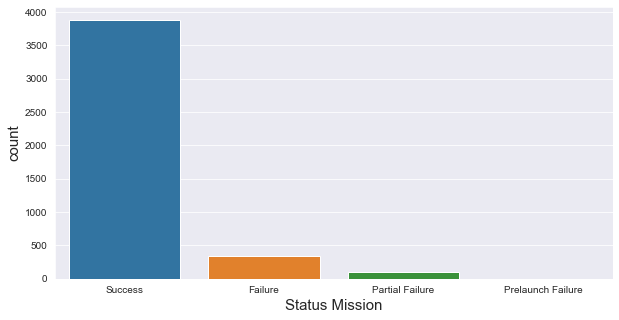

In [36]:
sm_label = df['Status Mission'].value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(sm_label.index, sm_label)
plt.ylabel('count', fontsize=15)
plt.xlabel('Status Mission', fontsize=15);

In [38]:
df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)

In [40]:
df['Status Mission'] = df['Status Mission'] == "Success"
df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,True
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,True
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,True
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,True
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,True


In [41]:
df['Status Mission'] = df['Status Mission'].apply(np.sum)
df.groupby('Company Name')['Status Mission'].sum()

Company Name
AEB                    0
AMBA                   4
ASI                    9
Arianespace          269
Arm??e de l'Air        3
Blue Origin           12
Boeing               131
CASC                 231
CASIC                  3
CECLES                 1
CNES                   6
Douglas                1
EER                    0
ESA                    9
Eurockot              12
ExPace                 9
Exos                   0
General Dynamics     203
IAI                    9
ILS                   45
IRGC                   1
ISA                    4
ISAS                  26
ISRO                  63
JAXA                   6
KARI                   1
KCST                   2
Khrunichev             1
Kosmotras             21
Land Launch            6
Landspace              0
Lockheed              74
MHI                   80
MITT                   6
Martin Marietta      100
NASA                 186
Northrop              74
OKB-586                2
OneSpace               0
RAE         

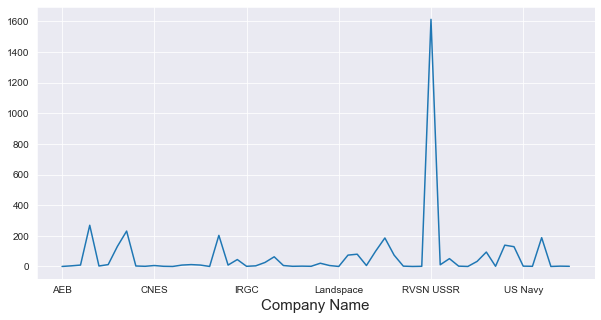

In [45]:
plt.figure(figsize=(10, 5))
df.groupby('Company Name')['Status Mission'].sum().plot();
plt.xlabel('Company Name', fontsize=15);

<Figure size 720x360 with 0 Axes>

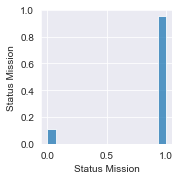

In [46]:
plt.figure(figsize=(10, 5))
sns.pairplot(df);